# Introduction

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.



# Comparison to linear regression


Given data on time spent studying and exam scores. Linear Regression and logistic regression can predict different things:

- *Linear Regression * could help us predict the student’s test score on a scale of 0 - 100. Linear regression predictions are continuous (numbers in a range).
- *Logistic Regression * could help use predict whether the student passed or failed. Logistic regression predictions are discrete (only specific values or categories are allowed). We can also view probability scores underlying the model’s classifications.


# Types of logistic regression
- Binary(Pass/Fail)
- Multi(Cats, Dogs, Sheep)
- Ordinal(Low, Medium, High)

# Binary Logistic Regression

data -->

| Studied     | Slept       | Passed  |
| ----------- | ----------- |---------|
| 4.85        | 9.63        |  1      |
| 8.62        | 3.23        |  0      |
| 5.43        | 8.23        |  1      |
| 9.21        | 6.34        |  0      |

our goal is to predict whether a student will pass or fail based on number of hours slept and hours spent studying. We have two features (hours slept, hours studied) and two classes: passed (1) and failed (0).


Graphically we could represent our data with a scatter plot.

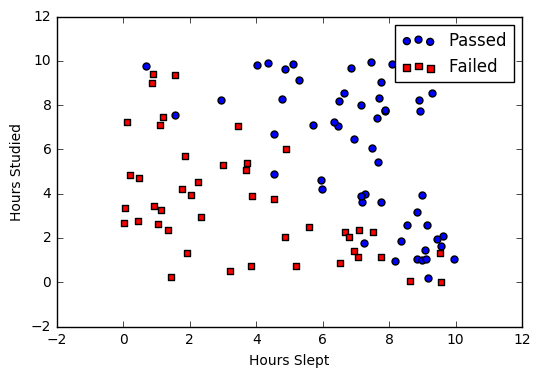

# Sigmoid activation

The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.


$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- $ \sigma(x) $ = output between 0 and 1 (probability estimate)
- x  =  input to the function (your algorithm’s prediction e.g. mx + b)
- e  =  base of natural log

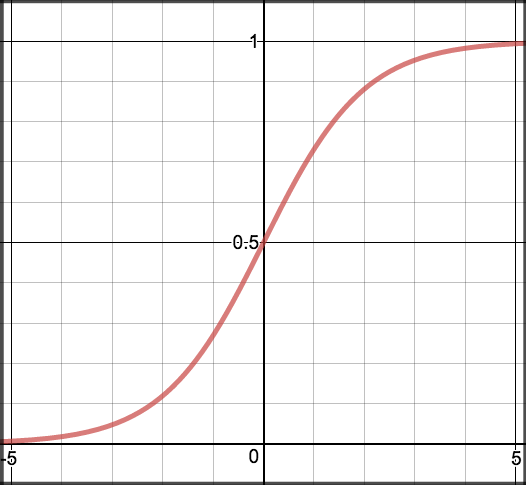

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-z))

# Decision Boundary

Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

                    p≥0.5,class=1
                    p<0.5,class=0
                    
For example, if our threshold was .5 and our prediction function returned .7, we would classify this observation as positive. If our prediction was .2 we would classify the observation as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.
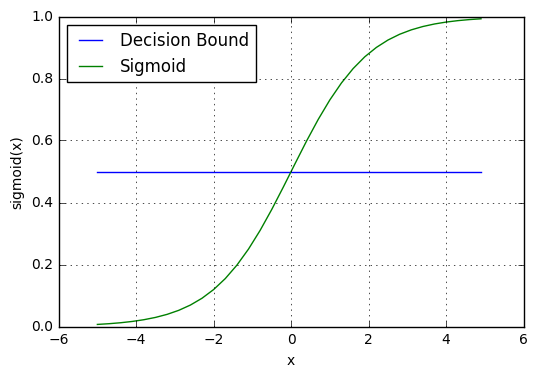

## Making predictions

Using our knowledge of sigmoid functions and decision boundaries, we can now write a prediction function. A prediction function in logistic regression returns the probability of our observation being positive, True, or “Yes”. We call this class 1 and its notation is P(class=1). As the probability gets closer to 1, our model is more confident that the observation is in class 1.


Let’s use the same multiple linear regression equation from our linear regression tutorial.

                z=W0+W1Studied+W2Slept
                
This time however we will transform the output using the sigmoid function to return a probability value between 0 and 1.

                P(class=1)= 1/(1+e^−z)
                
If the model returns .4 it believes there is only a 40% chance of passing. If our decision boundary was .5, we would categorize this observation as “Fail.””

In [9]:
  #Returns 1D array of probabilities that the class label == 1

def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)  


# Cost function

Unfortunately we can’t (or at least shouldn’t) use the same cost function MSE (L2) as we did for linear regression. Why? There is a great math explanation in chapter 3 of Michael Neilson’s deep learning book, but for now I’ll simply say it’s because our prediction function is non-linear (due to sigmoid transform). Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.


Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.

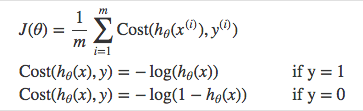

The benefits of taking the logarithm reveal themselves when you look at the cost function graphs for y=1 and y=0. These smooth monotonic functions (always increasing or always decreasing) make it easy to calculate the gradient and minimize cost. Image from Andrew Ng’s slides on logistic regression.

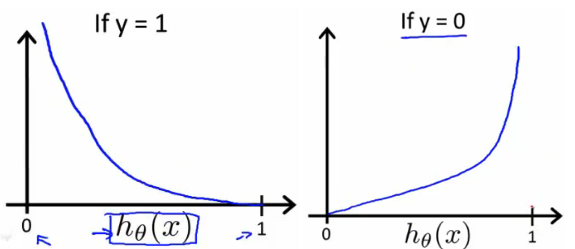

The key thing to note is the cost function penalizes confident and wrong predictions more than it rewards confident and right predictions! The corollary is increasing prediction accuracy (closer to 0 or 1) has diminishing returns on reducing cost due to the logistic nature of our cost function.

### Above Functions compressed into one
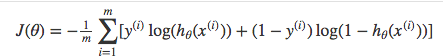

Multiplying by y and (1−y) in the above equation is a sneaky trick that let’s us use the same equation to solve for both y=1 and y=0 cases. If y=0, the first side cancels out. If y=1, the second side cancels out. In both cases we only perform the operation we need to perform.

### Vectorized cost function
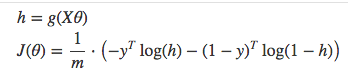


In [10]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

# Geadient descent

Repeat {

  1. Calculate gradient average
  2. Multiply by learning rate
  3. Subtract from weights

}

In [12]:
def update_weights(features, labels, weights, lr):
    
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient
 
    return weights

## Decision boundary

In [13]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

## Convert Probabilities to classes 

In [21]:
def classify(predictions):
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()
'''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  
'''
    

'\n  input  - N element array of predictions between 0 and 1\n  output - N element array of 0s (False) and 1s (True)\n  \n'

## Training

In [23]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

## Model Evaluation
If our model is working, we should see our cost decrease after every iteration.
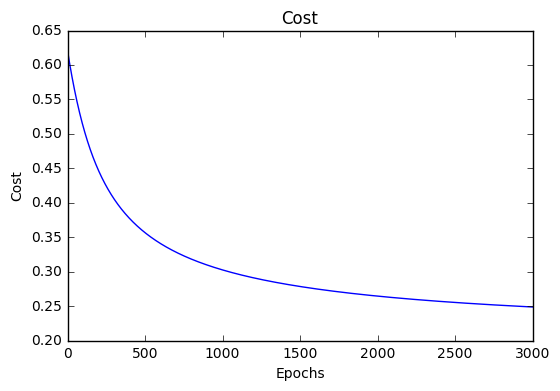

In [24]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))